**Classification Of Customers Visited To website.**

we have given dataset in which there are few independent variables from we have to predict the non purchaser and the purchaser from website.
 considering it is classification problem i have used classification models to classify the given data.

althogh All the features are self explanatory lets look their explanation:
User_ID : this is unique id of users who visited website
event_time : this is the event time in which user visited website.	
event_name : name of event
device_category: the type of device user used while visiting
event_source:event source
app_version: app version  
city:city of user 	
app_install_time: app installation time 
postal_code : postal code of user	
wifi : user used wifi or not	
country_code : user country	
media_source: source of media
all other features are self explanatory.
region 	state 	device_type 	advertising_channel 	language 	os_version 	platform 	ad_type 	event_revenue

**Lets start the code**

First we will import required Libraries here i have used new library called imblearn because given dataset is highly imbalanced. we will discuss this issue further.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from pandas import ExcelWriter
from pandas import ExcelFile
pd.options.display.max_columns


0

Now we will Load the data note that given data is in xslx format which requires few libraries which we have already imported

In [ ]:
df = pd.read_excel('Assignment_DataScience.xlsx', sheet_name= 'data')

Lets look at our dataset and do some EDA

In [ ]:
df.head()

,User_ID,event_time,event_name,device_category,event_source,app_version,city,app_install_time,postal_code,wifi,country_code,media_source,region,state,device_type,advertising_channel,language,os_version,platform,ad_type,event_revenue
0,1.0,2020-11-29 09:37:56.956 UTC,content_view,NaN,SDK,NaN,NaN,2020-04-28 17:16:02.471,NaN,NaN,NaN,organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,1.0,2020-11-29 09:35:53.79 UTC,list_view,NaN,SDK,NaN,NaN,2020-04-28 17:16:02.471,NaN,NaN,NaN,organic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2.0,2020-11-13 17:20:21.517 UTC,content_view,phone,SDK,5.3.2,Ghaziabad,2019-08-18 13:09:17.000,201303,0.0,IN,organic,AS,UP,iPhoneXR,NaN,en-IN,14.1,ios,NaN,0.0
3,2.0,2020-11-13 17:18:08.867 UTC,content_view,phone,SDK,5.3.2,Ghaziabad,2019-08-18 13:09:17.000,201303,0.0,IN,organic,AS,UP,iPhoneXR,NaN,en-IN,14.1,ios,NaN,0.0
4,2.0,2020-11-22 04:13:13.991 UTC,content_view,phone,SDK,5.3.2,Delhi,2020-11-13 17:29:19.142,110053,0.0,IN,googleadwords_int,AS,DL,iPhoneXR,Search,en-IN,14.1,ios,AppDeepLink,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294247 entries, 0 to 294246
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   User_ID              294246 non-null  float64       
 1   event_time           294247 non-null  object        
 2   event_name           294247 non-null  object        
 3   device_category      138117 non-null  object        
 4   event_source         294247 non-null  object        
 5   app_version          138117 non-null  object        
 6   city                 138117 non-null  object        
 7   app_install_time     294246 non-null  datetime64[ns]
 8   postal_code          138116 non-null  object        
 9   wifi                 138116 non-null  float64       
 10  country_code         138116 non-null  object        
 11  media_source         294151 non-null  object        
 12  region               137810 non-null  object        
 13  state         

From above code we found that data has 21 columns and 294247 entries tha tis huge number.Lets drop unnecessory columns that are not required to predict result.

In [ ]:
df.drop(['event_time', 'app_install_time', 'app_version', 'os_version'], axis= 1, inplace= True ) 

Lets check shape of data again

In [ ]:
df.shape

(294247, 17)

Now we will check do we have null values ?
Lets visualize 

In [ ]:
import missingno as msno

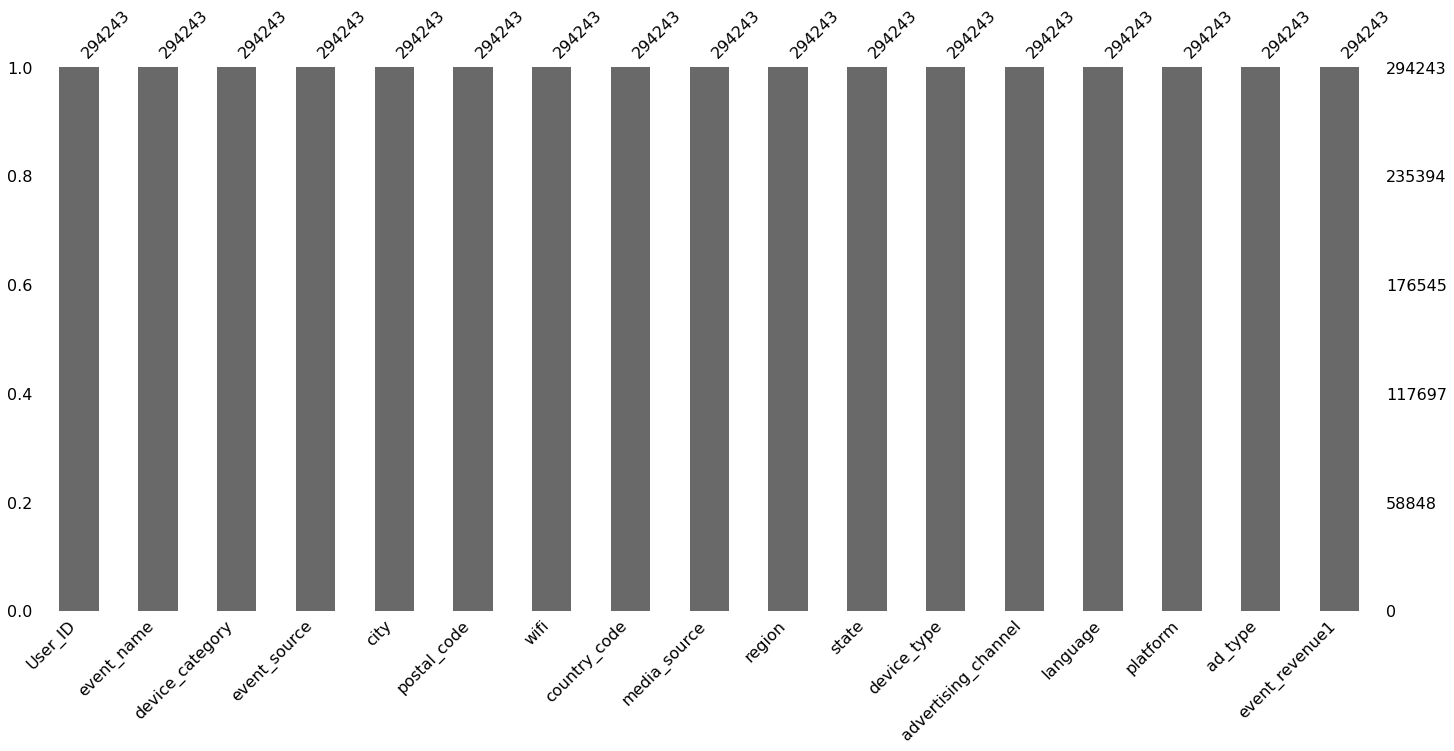

In [ ]:
msno.bar(df)

In [ ]:
df.isnull().sum()*100/len(df)

User_ID                 0.000340
event_name              0.000000
device_category        53.060864
event_source            0.000000
city                   53.060864
postal_code            53.061204
wifi                   53.061204
country_code           53.061204
media_source            0.032626
region                 53.165198
state                  53.061204
device_type            53.061204
advertising_channel    94.606572
language               53.061204
platform               53.061204
ad_type                96.840070
event_revenue           0.000340
dtype: float64

From above code we found that the dataset is full of missig values to achieve good results and accuracy we have to handle this missing values.
another reason to handle this missing values is some macine learning algorithms not work properly with missing values.here missing values are huge in number. we can handle them by one of the following methods.


1.   SimpleImputer Class with different imputation Techniques(mean,mode,median)
2.Interpolation method
3. By predicting missing values using machine learning algorithms
4. Imputation with Fillna method
5. Nowadays the experimental Package MICE can handle missing values.

After checking all of this method i found following drawbacks 
for simple imputation the features should be numerical featuees although we can use 'mode' imputation but it will fill most frequent values and there is possibility of repeatation of single variable multiple times.i also tried interpolation which requires to convert features to numeric values.because of computing power i havent used machine learning algorithm method the mice method is still in experimental phase so i have used fillna method with forward fill.








In [ ]:
df.fillna(method= 'ffill', inplace= True)

In [ ]:
df.isnull().sum()

User_ID                0
event_name             0
device_category        2
event_source           0
city                   2
postal_code            2
wifi                   2
country_code           2
media_source           0
region                 2
state                  2
device_type            2
advertising_channel    4
language               2
platform               2
ad_type                4
event_revenue          0
dtype: int64

We checked Misssing values again as we used forward fill imputation the first rows having missing values are not filled so looking at the dataset size we can simply delete it.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

User_ID                0
event_name             0
device_category        0
event_source           0
city                   0
postal_code            0
wifi                   0
country_code           0
media_source           0
region                 0
state                  0
device_type            0
advertising_channel    0
language               0
platform               0
ad_type                0
event_revenue          0
dtype: int64

In [ ]:
df['event_revenue1'] = np.where(df.event_revenue > 0, 1, 0)

Now we have cleaned the data. by observing data i found that our target variable has numerical values but we just have to find purchaser and non purchaser. so we dont need revenues so i converted this revenue values into boolean values of 0 and 1.now it will be easy to classify the data.lets look at the variables in the event revenue column.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


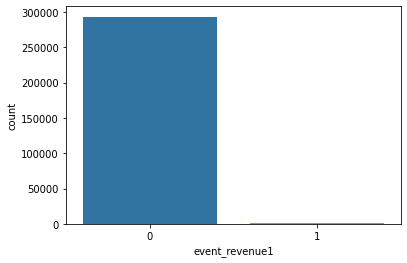

In [ ]:
sns.countplot(df.event_revenue1)

In [ ]:
df.event_revenue1.value_counts()

0    293407
1       836
Name: event_revenue1, dtype: int64

In [ ]:
df = df.drop('event_revenue', axis= 1)

We simply found that the dataset is highly imbalanced so we have to make it balanced in further steps.also ihave deleted previous event revenue column and replaced with new column.

In [ ]:
df.head()

,User_ID,event_name,device_category,event_source,city,postal_code,wifi,country_code,media_source,region,state,device_type,advertising_channel,language,platform,ad_type,event_revenue1
4,2.0,content_view,phone,SDK,Delhi,110053,0.0,IN,googleadwords_int,AS,DL,iPhoneXR,Search,en-IN,ios,AppDeepLink,0
5,2.0,re-engagement,phone,SDK,Ghaziabad,201303,0.0,IN,googleadwords_int,AS,UP,iPhoneXR,Search,en-IN,ios,AppDeepLink,0
6,3.0,list_view,phone,SDK,Ghaziabad,201303,0.0,IN,organic,AS,UP,iPhoneXR,Search,en-IN,ios,AppDeepLink,0
7,3.0,list_view,phone,SDK,Ghaziabad,201303,0.0,IN,organic,AS,UP,iPhoneXR,Search,en-IN,ios,AppDeepLink,0
8,3.0,list_view,phone,SDK,Ghaziabad,201303,0.0,IN,organic,AS,UP,iPhoneXR,Search,en-IN,ios,AppDeepLink,0


In [ ]:
!pip install category_encoders

Some machine learning models are not good with categorical data which is not numerical.so we have to encode this data for model to understand the features.
there are following techniques to do this:


*   One hot Encoding
*   Binary Encoding
*   Encoding with Labelencoder
*   Encoding Using Machine Learning model

All this techniques have their pros and cons after checking some of them i used **'binery encoding with base N'**
because one hot encoding creates multiple columns since we have more variables **the number of columns will be increase **and also there is chance **of dummy variable trap**.label encoder creates new labels for each variable but we have large number of variables so it is not worthy to use.because of my **low computation power **i have not tried machine learning model technique so i will go with **binary encoding** with base which will reduce number of column as we increase its base.





In [ ]:
import category_encoders as ce
encoder = ce.BaseNEncoder(cols=['event_name', 'event_source', 'device_category', 'city', 'postal_code', 'country_code', 'media_source', 'region', 'state', 'device_type', 'language', 'platform', 'advertising_channel', 'ad_type'], return_df=True, base=5)      


In [ ]:
df1 = encoder.fit_transform(df)
df1.head()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,User_ID,event_name_0,event_name_1,event_name_2,device_category_0,device_category_1,event_source_0,city_0,city_1,city_2,city_3,city_4,city_5,postal_code_0,postal_code_1,postal_code_2,postal_code_3,postal_code_4,postal_code_5,postal_code_6,wifi,country_code_0,country_code_1,country_code_2,country_code_3,media_source_0,media_source_1,media_source_2,region_0,region_1,state_0,state_1,state_2,state_3,device_type_0,device_type_1,device_type_2,device_type_3,advertising_channel_0,advertising_channel_1,advertising_channel_2,language_0,language_1,language_2,language_3,platform_0,ad_type_0,ad_type_1,event_revenue1
4,2.0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0
5,2.0,0,0,2,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0.0,0,0,0,1,0,0,1,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0
6,3.0,0,0,3,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0.0,0,0,0,1,0,0,2,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0
7,3.0,0,0,3,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0.0,0,0,0,1,0,0,2,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0
8,3.0,0,0,3,0,1,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0.0,0,0,0,1,0,0,2,0,1,0,0,0,2,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0


In [ ]:
df1.isnull().sum()

User_ID                  0
event_name_0             0
event_name_1             0
event_name_2             0
device_category_0        0
device_category_1        0
event_source_0           0
city_0                   0
city_1                   0
city_2                   0
city_3                   0
city_4                   0
city_5                   0
postal_code_0            0
postal_code_1            0
postal_code_2            0
postal_code_3            0
postal_code_4            0
postal_code_5            0
postal_code_6            0
wifi                     0
country_code_0           0
country_code_1           0
country_code_2           0
country_code_3           0
media_source_0           0
media_source_1           0
media_source_2           0
region_0                 0
region_1                 0
state_0                  0
state_1                  0
state_2                  0
state_3                  0
device_type_0            0
device_type_1            0
device_type_2            0
d

**Lets check corelation of features with target variables**
there is no strong corelation between features

In [ ]:
df1[df1.columns[1:]].corr()['event_revenue1'][:]

event_name_0                  NaN
event_name_1             0.087129
event_name_2             0.074091
device_category_0             NaN
device_category_1        0.000283
event_source_0                NaN
city_0                        NaN
city_1                   0.003524
city_2                   0.001157
city_3                   0.000936
city_4                   0.000825
city_5                   0.001038
postal_code_0                 NaN
postal_code_1            0.001642
postal_code_2            0.002687
postal_code_3            0.001376
postal_code_4            0.000343
postal_code_5           -0.002304
postal_code_6            0.003463
wifi                    -0.005043
country_code_0                NaN
country_code_1          -0.000652
country_code_2          -0.000783
country_code_3           0.002771
media_source_0                NaN
media_source_1          -0.000549
media_source_2           0.001452
region_0                      NaN
region_1                -0.001569
state_0       

In [ ]:
#df['event_name'] =df['event_name'].astype('category').cat.codes
#df['device_category'] =df['device_category'].astype('category').cat.codes
#df['event_source'] =df['event_source'].astype('category').cat.codes
#df['city'] =df['city'].astype('category').cat.codes
#df['postal_code'] =df['postal_code'].astype('category').cat.codes
#df['media_source'] =df['media_source'].astype('category').cat.codes
#df['region'] =df['region'].astype('category').cat.codes
#df['state'] =df['state'].astype('category').cat.codes
#df['advertising_channel'] = ['advertising_channel'].astype('category').cat.codes
#df['language'] =df['language'].astype('category').cat.codes
#df['platform'] =df['platform'].astype('category').cat.codes
#df['event_revenue'] =df['event_revenue'].astype('category').cat.codes

Now its time to split dataset into training and testing data. we will also apply standardisation.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X = df1.drop('event_revenue1', axis=1)
y = df1['event_revenue1']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.3)

In [ ]:
y_test.count()

88273

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we will check the accuracy of this **imbalanced dataset** by using random forest classification algorithm.

**Why random forest?**

because it is ensemble learning technique and ensemble learning techniques uses bagging also it consists of multiple decision trees and it work better in such datasets.
so lets try

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

#make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)


# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))
print(classification_report(y_test, y_pred_rfc))

Random Forest Classifier model accuracy(in %): 99.72
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     88024
           1       0.00      0.00      0.00       249

    accuracy                           1.00     88273
   macro avg       0.50      0.50      0.50     88273
weighted avg       0.99      1.00      1.00     88273



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


As we see the results accuracy is near about **100% dont get excited the model is fooling us** . because it has taken large amount of non purchasers i.e, 0 value as training set so given the result for the same. if we look at the precisionand recall we will come to know the problem.so lets try to make the **target varibles balanced **for doing this there are following techniques.

*   Traditional undersampling
*   Traditional oversampling
*   The smote algorithm
*   KNN approach

i willl be using smote technique which combination of both but work on oversampling.






In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_sample(X_train, y_train.ravel())
counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 205383, 1: 587})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Counter({0: 205383, 1: 205383})


After balancing the target we can apply our model on smotes train variables.also we can increase the performance of model by hyperparameter techniques but beacause of low computational power of my pc i didnt get  fast results so i will skip this part.and train our model using random forest and logistic regression.

In [ ]:
####this part is skipped due to low computation power in my pc
from sklearn.model_selection import RandomizedSearchCV
 #Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
 #Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
#Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
####this part is skipped due to low computation power in my pc
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=20,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_sm,  y_train_sm)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
rfc1 = RandomForestClassifier(max_depth=5, random_state=2, n_estimators= 100)
rfc1.fit(X_train_sm,  y_train_sm)

# make prediction using our test data and model
y_pred = rfc1.predict(X_test)
y_prob = rfc1.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred)*100,2))
print(classification_report(y_test, y_pred))

Random Forest Classifier model accuracy(in %): 96.73
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     88024
           1       0.07      0.87      0.13       249

    accuracy                           0.97     88273
   macro avg       0.53      0.92      0.56     88273
weighted avg       1.00      0.97      0.98     88273



As we can see results we reduced the actual accuracy of our previous model we can also make it more accurate by using hyperparameter tuning.we can also try Knn but it requires more computational power lets implement simple logistic regression model.**Predicted results is not necessarily the best but it is better than imbalanced one**.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter= 200)
lr.fit(X_train_sm,  y_train_sm)
y_pred1 = lr.predict(X_test)
print('Logistic regression model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred1)*100,2))
print(classification_report(y_test, y_pred1))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic regression model accuracy(in %): 94.32
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     88024
           1       0.05      1.00      0.09       249

    accuracy                           0.94     88273
   macro avg       0.52      0.97      0.53     88273
weighted avg       1.00      0.94      0.97     88273



In logistic regresion model we get better precision and overall accuracy of **94.32%**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_sm, y_train_sm)
y_pred2 = knn.predict(X_test)
print(' KNeighborsClassifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred2)*100,2))
print(classification_report(y_test, y_pred2))


 KNeighborsClassifier model accuracy(in %): 97.37
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     88024
           1       0.02      0.22      0.04       249

    accuracy                           0.97     88273
   macro avg       0.51      0.60      0.52     88273
weighted avg       0.99      0.97      0.98     88273



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


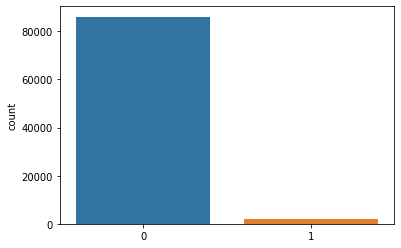

In [ ]:
sns.countplot(y_pred2, data= df1)

In [ ]:
print(y_test, y_pred)


24558     0
237720    0
2334      0
1867      0
292406    0
         ..
204207    0
270668    0
62404     0
254716    0
232130    0
Name: event_revenue1, Length: 88273, dtype: int64 [0 0 0 ... 0 0 0]


Final Words Summary

The given dataset was **highly imbalanced **and consists of **large number of missing values **if we dropped all missing rows then there will be a huge information leakage so after predicting missing values i have managed to keep **satisfactory** accuracy although it can be increased using different hyperparameter techniques and dimensionality reduction techniques.**the predicted results can be shown graphically using heroku or aws.**

thank you !!